In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv("dataset/test.csv")


In [3]:
train.shape , test.shape 


((1259, 81), (1259, 80))

In [4]:
missing_values = pd.concat([train.isnull().sum(), test.isnull().sum()], axis = 1, keys = ['TRAIN', 'TEST'])
missing_values[missing_values.sum(axis=1)>0]

,TRAIN,TEST
MSZoning,0,4.0
LotFrontage,229,187.0
Alley,1180,1156.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,7,14.0
MasVnrArea,7,13.0
BsmtQual,32,41.0
BsmtCond,32,42.0


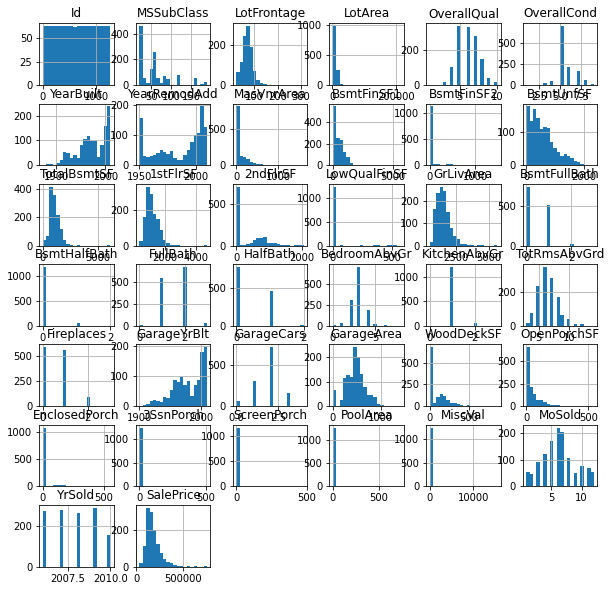

In [5]:
hist= train.hist(bins=20,figsize=(10,10))
plt.savefig("beforeprocessing.png")

In [ ]:
for column in train.columns[1:-1]:
    if train[column].dtype == 'int64' or train[column].dtype == 'float64':
        sns.scatterplot(data=train,x='Id',y=column)
        plt.show()

In [6]:
corr= train.corr()
sort=corr.unstack()
sorted_corr= sort.sort_values(kind= "quicksort", ascending= False)

sorted_corr[(sorted_corr<1) & (sorted_corr>0.75)]

GarageCars    GarageArea      0.881195
GarageArea    GarageCars      0.881195
GarageYrBlt   YearBuilt       0.821649
YearBuilt     GarageYrBlt     0.821649
TotRmsAbvGrd  GrLivArea       0.820580
GrLivArea     TotRmsAbvGrd    0.820580
1stFlrSF      TotalBsmtSF     0.808478
TotalBsmtSF   1stFlrSF        0.808478
OverallQual   SalePrice       0.789612
SalePrice     OverallQual     0.789612
dtype: float64

In [7]:
sales_corr= train.corr()['SalePrice']

sorted_corr2= sales_corr.sort_values(kind= "quicksort", ascending= False)

sorted_corr2[(sorted_corr2<=1) & (sorted_corr2>0.60)]

SalePrice      1.000000
OverallQual    0.789612
GrLivArea      0.708477
GarageCars     0.639370
GarageArea     0.627419
TotalBsmtSF    0.615773
1stFlrSF       0.609950
Name: SalePrice, dtype: float64

In [8]:
train.drop(['GarageYrBlt','GarageCars','TotRmsAbvGrd','PoolQC','Fence','MiscFeature','FireplaceQu','Alley'], axis=1, inplace=True)
test.drop(['GarageYrBlt','GarageCars','TotRmsAbvGrd','PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'], axis=1, inplace=True)

In [9]:
new_corr = train.corr()
unstacked= new_corr.unstack()
sorted_unstacked= unstacked.sort_values(kind= "quicksort", ascending= False)
sorted_unstacked[(sorted_unstacked<1) & (sorted_unstacked>0.75 )]


1stFlrSF     TotalBsmtSF    0.808478
TotalBsmtSF  1stFlrSF       0.808478
SalePrice    OverallQual    0.789612
OverallQual  SalePrice      0.789612
dtype: float64

<AxesSubplot:>

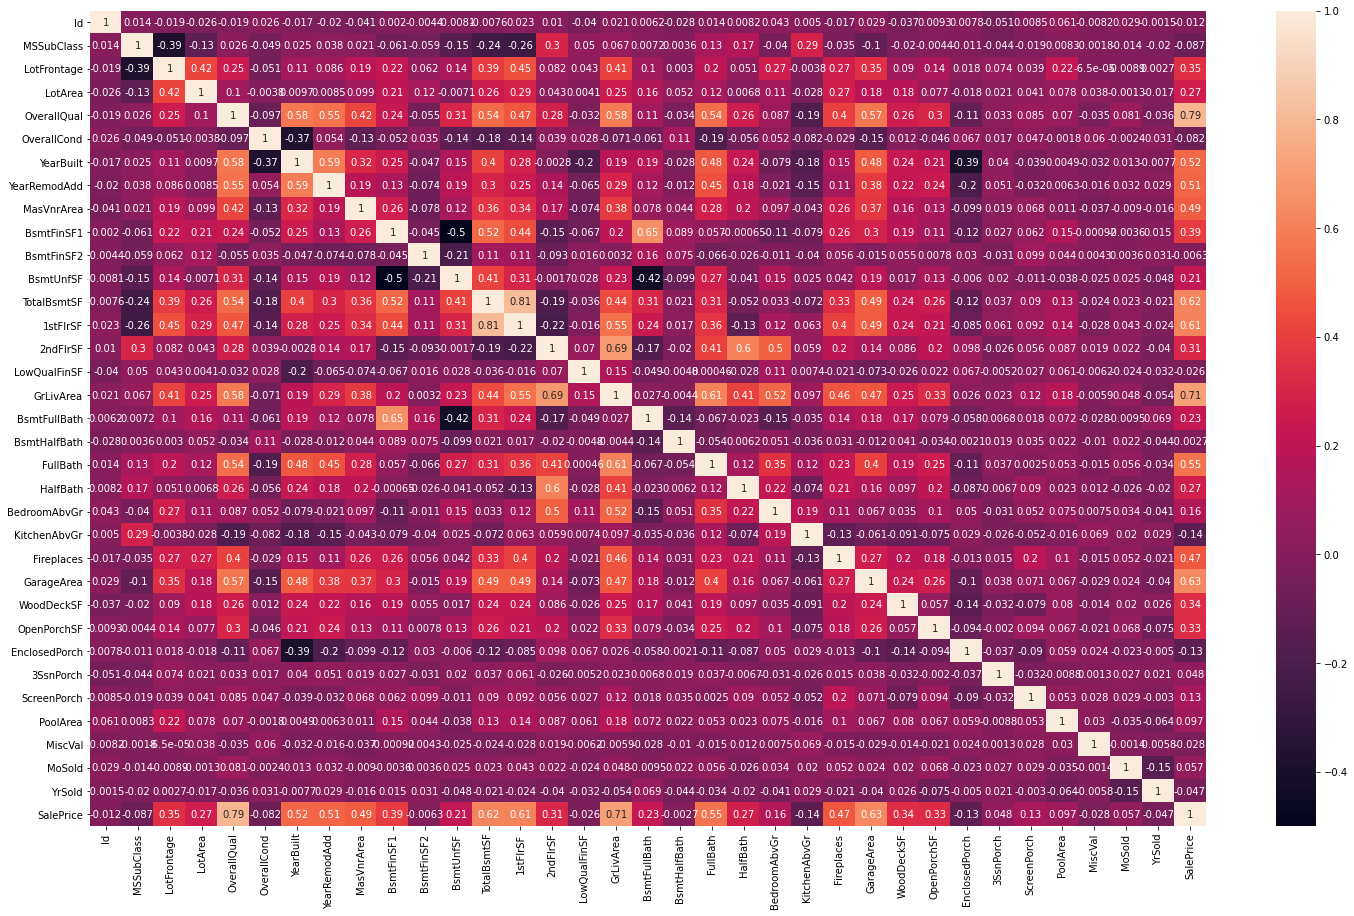

In [13]:
fig,ax=plt.subplots(figsize=(25,15))
sns.heatmap(new_corr,annot=True,ax=ax)

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer_columns = SimpleImputer(strategy="mean")
imputer_categoric = SimpleImputer(strategy='most_frequent')

In [16]:
categoric_data = train.select_dtypes(include=('object'))
numeric_data = train.select_dtypes(exclude=('object'))

In [17]:
imputer_categoric.fit(categoric_data)
c_tr = imputer_categoric.transform(categoric_data)

imputer_columns.fit(numeric_data)
n_tr = imputer_columns.transform(numeric_data)

In [18]:
categoric_tr = pd.DataFrame(c_tr, columns=categoric_data.columns, index=categoric_data.index)
numeric_tr = pd.DataFrame(n_tr, columns=numeric_data.columns, index=numeric_data.index)

In [19]:
result = pd.concat([categoric_tr,numeric_tr], axis=1)
result = result.reindex(columns=train.columns)

In [20]:
print("Null count is:",result.isnull().sum().sum())

Null count is: 0


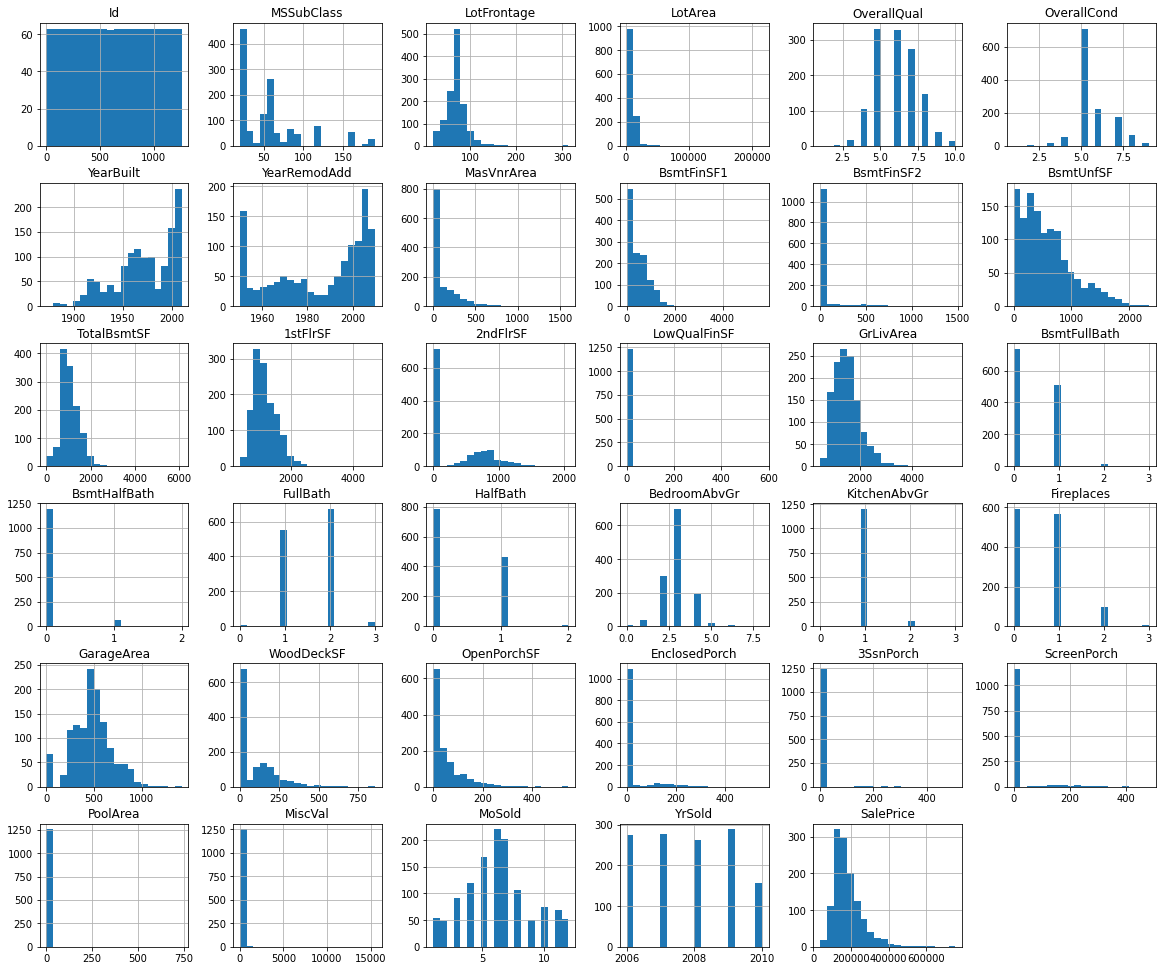

In [21]:
hist= result.hist(bins=20,figsize=(20,17))
plt.savefig("afterprocessing.png")

In [22]:
x = result.drop(["Id","SalePrice"], axis=1).copy()
y = result["SalePrice"].copy().to_frame()

In [23]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler, RobustScaler
ohe = OneHotEncoder()
x_enc = ohe.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_enc, y, test_size=0.2, random_state=42)

In [26]:
scaler = RobustScaler(with_centering=False)
x_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)
y_sc = scaler.fit_transform(y_train)
y_test_sc = scaler.fit_transform(y_test)

In [28]:
x_sc.shape, x_test.shape, y_sc.shape, y_test.shape

((1007, 6898), (252, 6898), (1007, 1), (252, 1))

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {
    'n_estimators'      : [100, 200, 500],
    'learning_rate'     : [0.01, 0.02, 0.1],
    'max_depth'         : [3, 5, 7, 10],
    'min_child_weight'  : [1, 3, 5],
    'subsample'         : [0.5, 0.7],
    'objective'         : ['reg:squarederror']
    
}

In [31]:
xgb = GridSearchCV(XGBRegressor(), parameters, cv=5, n_jobs=-1, verbose=3)
xgb.fit(x_sc, y_sc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [32]:
print('Best Model Parameters:', xgb.best_params_)
print('Best score:', xgb.best_score_)

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}
Best score: 0.8362962491340568


In [33]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
xgb_best = xgb.best_estimator_
predict = xgb_best.predict(x_test_sc)
print('Best score:', xgb_best.score(x_test_sc, y_test_sc)) #olduğu kadar olmadığı kader (Kappa)
print('Mean Squared Error:', mean_squared_error(y_test_sc,predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_sc,predict)))

Best score: 0.7256958693486506
Mean Squared Error: 0.27190727624041705
Root Mean Squared Error: 0.521447289992399


In [ ]:
def imputer(frame):
    imputer_columns = SimpleImputer(strategy="mean")
    imputer_categoric = SimpleImputer(strategy='most_frequent')

    categoric_data = frame.select_dtypes(include=('object'))
    numeric_data = frame.select_dtypes(exclude=('object'))

    imputer_categoric.fit(categoric_data)
    c_tr = imputer_categoric.transform(categoric_data)

    imputer_columns.fit(numeric_data)
    n_tr = imputer_columns.transform(numeric_data)

    categoric_tr = pd.DataFrame(c_tr, columns=categoric_data.columns, index=categoric_data.index)
    numeric_tr = pd.DataFrame(n_tr, columns=numeric_data.columns, index=numeric_data.index)

    result = pd.concat([categoric_tr,numeric_tr], axis=1)
    result = result.reindex(columns=frame.columns)

    return result

In [ ]:
test_final = imputer(test)
#ID = test["Id"]

In [ ]:
tf= ohe.fit_transform(test_final)

In [ ]:
tf_sc = scaler.fit_transform(tf)

In [ ]:
#test_pred = xgb_best.predict(tf_sc)
#df_submission = pd.DataFrame({'SalePrice': test_pred })